<a href="https://colab.research.google.com/github/lucasnofear/Deep-Learning-with-Python-Practice/blob/Keras-and-Tensorflow/ch3_5_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Work with Reuters dataset to classify newswire into different categories.

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data), len(test_data)

(8982, 2246)

In [4]:
# decode back to words
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

Prepare the data

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
# one-hot encodeing to vectorize the labels
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
# or use the building in Keras function to do the one-hot encoding in the previous step
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
one_hot_train_labels.shape

(8982, 46)

Build the network

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

Validatation

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 150us/step - loss: 2.6477 - accuracy: 0.5139 - val_loss: 1.7181 - val_accuracy: 0.6500
Epoch 2/20
7982/7982 [==============================] - 1s 119us/step - loss: 1.4133 - accuracy: 0.7027 - val_loss: 1.2976 - val_accuracy: 0.7250
Epoch 3/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.0476 - accuracy: 0.7769 - val_loss: 1.1239 - val_accuracy: 0.7580
Epoch 4/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.8293 - accuracy: 0.8265 - val_loss: 1.0365 - val_accuracy: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.6655 - accuracy: 0.8583 - val_loss: 0.9832 - val_accuracy: 0.7900
Epoch 6/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.5335 - accuracy: 0.8877 - val_loss: 0.9459 - val_accuracy: 0.8000
Epoch 7/20
7982/7982 [==============================] - 1s 117us/step - loss

In [23]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

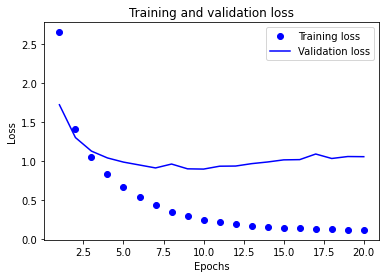

In [19]:
# plot loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

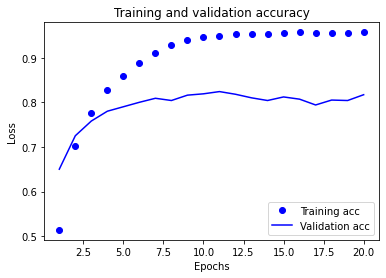

In [24]:
# plot accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
# retrain the model with 9 epoach since it starts to overfitting after 9 epoach
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 127us/step - loss: 2.6181 - accuracy: 0.4796 - val_loss: 1.7664 - val_accuracy: 0.6280
Epoch 2/9
7982/7982 [==============================] - 1s 117us/step - loss: 1.4300 - accuracy: 0.7070 - val_loss: 1.3045 - val_accuracy: 0.7360
Epoch 3/9
7982/7982 [==============================] - 1s 115us/step - loss: 1.0381 - accuracy: 0.7878 - val_loss: 1.1179 - val_accuracy: 0.7700
Epoch 4/9
7982/7982 [==============================] - 1s 116us/step - loss: 0.8053 - accuracy: 0.8327 - val_loss: 1.0313 - val_accuracy: 0.7920
Epoch 5/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.6436 - accuracy: 0.8614 - val_loss: 0.9622 - val_accuracy: 0.8040
Epoch 6/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.5085 - accuracy: 0.8921 - val_loss: 0.9565 - val_accuracy: 0.8100
Epoch 7/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.411

In [26]:
results  # 77.5% accuracy

[1.0322708894605628, 0.7751558423042297]

In [27]:
# build a random classifier and check the benchmark accuracy
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19278717720391808

In [29]:
y_train = np.array(train_labels)
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [0]:
# if the labels are encoded as integers, the loss function should be sparse_categorical_crossentropy.
model.compile(optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['acc'])

A model with a bottleneck layer with only 4 hidden units

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=128,
        validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 161us/step - loss: 3.0404 - accuracy: 0.2135 - val_loss: 2.5593 - val_accuracy: 0.2450
Epoch 2/20
7982/7982 [==============================] - 1s 158us/step - loss: 2.0448 - accuracy: 0.3534 - val_loss: 1.6805 - val_accuracy: 0.6370
Epoch 3/20
7982/7982 [==============================] - 1s 157us/step - loss: 1.3614 - accuracy: 0.6914 - val_loss: 1.4103 - val_accuracy: 0.6860
Epoch 4/20
7982/7982 [==============================] - 1s 158us/step - loss: 1.1439 - accuracy: 0.7268 - val_loss: 1.3522 - val_accuracy: 0.6880
Epoch 5/20
7982/7982 [==============================] - 1s 154us/step - loss: 1.0142 - accuracy: 0.7476 - val_loss: 1.3007 - val_accuracy: 0.6950
Epoch 6/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.9174 - accuracy: 0.7680 - val_loss: 1.2845 - val_accuracy: 0.7040
Epoch 7/20
7982/7982 [==============================] - 1s 162us/step - loss

Experiment with a larger hidden layer

In [31]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=128,
        validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 249us/step - loss: 1.5605 - accuracy: 0.6720 - val_loss: 1.1070 - val_accuracy: 0.7650
Epoch 2/20
7982/7982 [==============================] - 2s 240us/step - loss: 0.7688 - accuracy: 0.8284 - val_loss: 0.9350 - val_accuracy: 0.8070
Epoch 3/20
7982/7982 [==============================] - 2s 237us/step - loss: 0.4622 - accuracy: 0.9017 - val_loss: 0.8725 - val_accuracy: 0.8130
Epoch 4/20
7982/7982 [==============================] - 2s 237us/step - loss: 0.3096 - accuracy: 0.9322 - val_loss: 0.8978 - val_accuracy: 0.8100
Epoch 5/20
7982/7982 [==============================] - 2s 239us/step - loss: 0.2260 - accuracy: 0.9464 - val_loss: 0.8925 - val_accuracy: 0.8300
Epoch 6/20
7982/7982 [==============================] - 2s 237us/step - loss: 0.1902 - accuracy: 0.9526 - val_loss: 0.9418 - val_accuracy: 0.8200
Epoch 7/20
7982/7982 [==============================] - 2s 240us/step - loss

Experiment a network with more layers

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=128,
        validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 168us/step - loss: 1.8588 - accuracy: 0.6143 - val_loss: 1.2610 - val_accuracy: 0.6900
Epoch 2/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.9919 - accuracy: 0.7722 - val_loss: 1.0685 - val_accuracy: 0.7790
Epoch 3/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.6751 - accuracy: 0.8474 - val_loss: 0.9764 - val_accuracy: 0.7920
Epoch 4/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.4592 - accuracy: 0.8978 - val_loss: 1.0563 - val_accuracy: 0.7990
Epoch 5/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.3339 - accuracy: 0.9271 - val_loss: 1.1133 - val_accuracy: 0.7750
Epoch 6/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.2666 - accuracy: 0.9400 - val_loss: 1.1732 - val_accuracy: 0.7770
Epoch 7/20
7982/7982 [==============================] - 1s 161us/step - loss

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=128,
        validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 160us/step - loss: 1.8692 - accuracy: 0.6446 - val_loss: 1.2045 - val_accuracy: 0.7230
Epoch 2/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.9393 - accuracy: 0.7992 - val_loss: 0.9613 - val_accuracy: 0.8100
Epoch 3/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.6411 - accuracy: 0.8667 - val_loss: 0.8678 - val_accuracy: 0.8140
Epoch 4/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.4605 - accuracy: 0.9023 - val_loss: 0.8159 - val_accuracy: 0.8290
Epoch 5/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.3433 - accuracy: 0.9247 - val_loss: 0.8229 - val_accuracy: 0.8350
Epoch 6/20
7982/7982 [==============================] - 1s 154us/step - loss: 0.2703 - accuracy: 0.9394 - val_loss: 0.8186 - val_accuracy: 0.8290
Epoch 7/20
7982/7982 [==============================] - 1s 154us/step - loss